In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Fish.csv')

In [4]:
#task no 1
df.loc[df['Height']==df['Height'].max()]

,Species,Weight,Length1,Length2,Length3,Height,Width
29,Bream,1000.0,33.5,37.0,42.6,18.957,6.603


In [5]:
#task no 2
df[(df['Species']=='Pike')&(df['Weight']>500)]

,Species,Weight,Length1,Length2,Length3,Height,Width
135,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
136,Pike,540.0,40.1,43.0,45.8,7.7860,5.1296
138,Pike,567.0,43.2,46.0,48.7,7.7920,4.8700
139,Pike,770.0,44.8,48.0,51.2,7.6800,5.3760
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


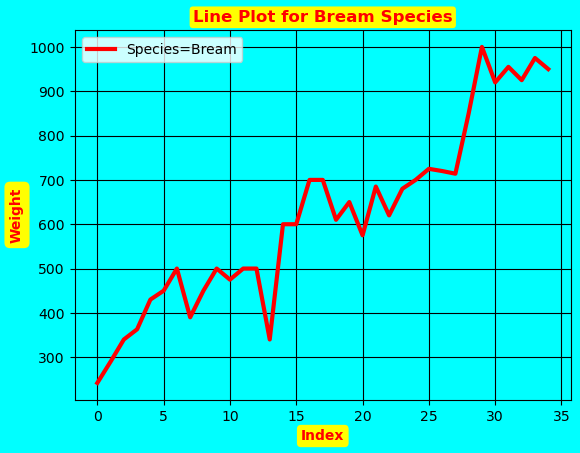

In [63]:
# Visualizing the targeted data with the help of matplotlib
import matplotlib.pyplot as plt

bream_data = df[df['Species'] == 'Bream']

x = bream_data.index  
y = bream_data['Weight']

plt.plot(x, y, label='Species=Bream', color='red', lw=3)
plt.xlabel('Index', color='red',fontweight='bold', bbox=dict(facecolor='yellow',
                                    edgecolor='none', boxstyle='round,pad=0.3'))  
plt.ylabel('Weight', color='red',fontweight='bold', bbox=dict(facecolor='yellow',
                                    edgecolor='none', boxstyle='round,pad=0.4'))
plt.title('Line Plot for Bream Species', fontweight='bold', color='red',
          bbox=dict(facecolor='yellow', edgecolor='none', boxstyle='round,pad=0.2'))
plt.gca().set_facecolor('cyan')
plt.gcf().set_facecolor('cyan')
plt.grid(color='black')
plt.legend()
plt.show()


In [43]:
df.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [60]:
#task no 4
df.drop(columns={'Length1','Length2','Length3'},inplace=True)

In [61]:
df.head(2)

,Species,Weight,Height,Width
0,Bream,242.0,11.52,4.0200
1,Bream,290.0,12.48,4.3056


In [62]:
#converting technique string to int
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])


In [63]:
#task no 5,6 & 7
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['Weight','Height','Width']]
y = df['Species']

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifier = LogisticRegression(max_iter=1000)  
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.25%


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
